# ROC曲線を求めて、AUCを計算する。

- 適当なデータセットでロジスティック回帰を行う。
- その時のAUCを求める。
- できれば色々なモデルで試す。

# 実装のメモ

２値分類を行うため、ガンデータを用いる。

ROC曲線を求めるアルゴリズムを作る
    
    混合行列の算出
    
    閾値を変更する
    
AUCを計算するアルゴリズムを作る
    
    

２値分類を行う様々なアルゴリズムを作る



In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import matplotlib.pyplot as plt
%matplotlib inline

/Users/yohei.moriya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/yohei.moriya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/yohei.moriya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/yohei.moriya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/yohei.moriya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/yoh

In [2]:
def get_data() -> pd.DataFrame:
    '''
    データセットを作成します
    '''
    origin_data = load_breast_cancer()
    df_origin = pd.DataFrame(origin_data.data, columns=origin_data.feature_names)
    df_origin['target'] = origin_data.target
    return df_origin

def get_dataset() -> pd.DataFrame:
    df_origin = get_data()
    num = 0.8
    df_train = df_origin.sample(frac=num)
    df_test = df_origin.drop(df_train.index)
    train_x, train_y = df_train.drop('target', axis=1), df_train['target']
    test_x, test_y  = df_test.drop('target', axis=1), df_test['target']
    return train_x, train_y, test_x, test_y

# test
df_train_x, df_train_y, df_test_x, df_test_y = get_dataset()
clf = LogisticRegression()
clf.fit(df_train_x, df_train_y)
predict = clf.predict(df_test_x)
score = clf.score(df_test_x, df_test_y)
print(score)

clf = SVC(kernel='linear', random_state=None)
clf.fit(df_train_x, df_train_y)
predict = clf.predict(df_test_x)
score = clf.score(df_test_x, df_test_y)
print(score)

0.9649122807017544
0.9649122807017544


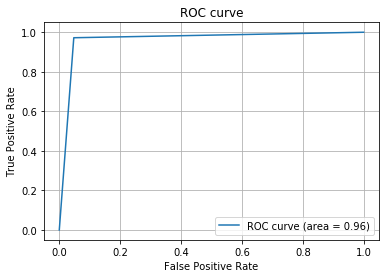

In [3]:
def cal_roc(nd_t, nd_h):
    '''
    ROC曲線を算出します。
    '''
    if nd_t.ndim != 1 or nd_h.ndim != 1:
        raise Exception('引数不正：入力を１次元にしてください')
    if nd_t.shape[0] != nd_h.shape[0]:
        raise Exception('引数不正:入力されたベクトルの要素が一致していません')
    
    fpr, tpr, thresholds = metrics.roc_curve(nd_t, nd_h)
    auc = metrics.auc(fpr, tpr)
    return fpr, tpr, auc

# test 
fpr, tpr, auc = cal_roc(df_test_y.values, predict)
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

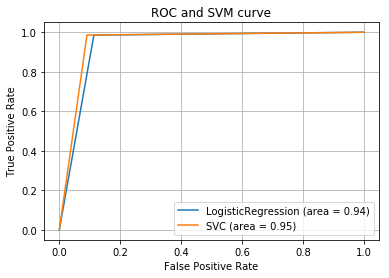

In [4]:
def fit(clf_list, nd_train_x, nd_train_y, nd_test_x):
    '''
    モデルを用いて学習を行います。
    '''
    for clf in clf_list:
        clf.fit(nd_train_x, nd_train_y)
    return clf_list

def main():
    df_train_x, df_train_y, df_test_x, df_test_y = get_dataset()
    clf_list = [LogisticRegression(), SVC(kernel='linear', random_state=None)]
    clf_list = fit(clf_list, df_train_x.values, df_train_y.values, df_test_x.values)
    
    for clf in clf_list:
        predict = clf.predict(df_test_x.values)
        fpr, tpr, auc = cal_roc(df_test_y.values, predict)
        plt.plot(fpr, tpr, label="{0} (area = {1})".format(clf.__class__.__name__, round(auc, 2)))
    
    plt.legend()
    plt.title('ROC and SVM curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)

main()
